## Task - 5  :- Exploratory Data Analysis - Sports (Level - Advanced)

### The Sparks Foundation Internship Program
### Data Science & Business Analytics Internship 
In this task,we will be performing exploratory data analysis on the dataset "Matches", "deliveries" and try to find out the most successful teams, players and factors
contributing win or loss of a teams.

### Performed by : Pratik Patil


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv("C:/Users/prati/Desktop/Project/EDA IPL/matches.csv")
score = pd.read_csv("C:/Users/prati/Desktop/Project/EDA IPL/deliveries.csv")

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
score.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# DATA INFORMATION

print(matches.info())
print(score.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches["umpire3"].isnull().sum()


637

In [7]:
matches["umpire3"].tail(10)

746              Nanda Kishore
747      KN Ananthapadmanabhan
748                Nitin Menon
749               Ulhas Gandhe
750             Bruce Oxenford
751                     S Ravi
752                  Ian Gould
753                        NaN
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, dtype: object

In [8]:
matches.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
 
matches['id'].max()

11415

In [10]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [11]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [12]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

##### Team won by Maximum Runs - Mumbai Indians

In [13]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

#### Team won by Maximum Wickets - 'Kolkata Knight Riders'

In [14]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

#### Team won by minimum runs - 'Mumbai Indians'

In [15]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]


id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [16]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

#### Team won by Minimum Wickets - 'Kolkata Knight Riders'

## Conclusion

**Mumbai Indians** is the team which won by **maximum and minimum** runs

**Kolkata Knight Riders** is the team which won by **maximum and minimum** wickets

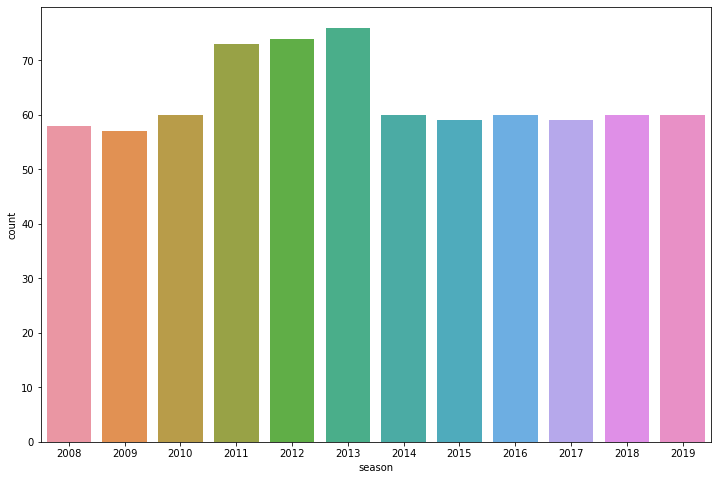

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x='season', data=matches)
plt.show()

In **2013**, we have the **most number of matches played**

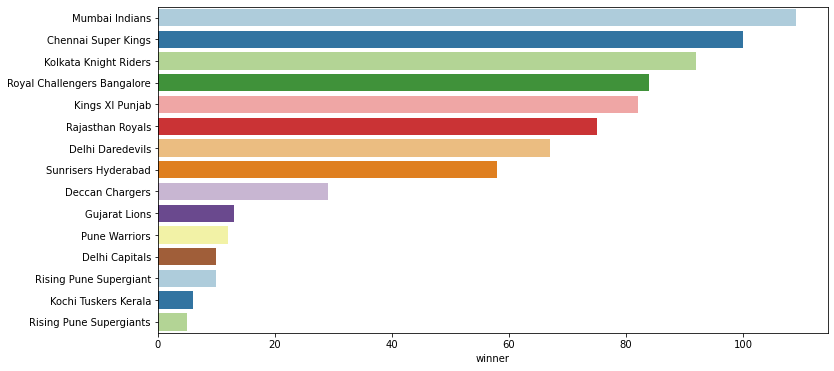

In [18]:
plt.figure(figsize=(12,6))
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h',palette = "Paired")
plt.show()

**Mumbai Indians** are the winners in most of the matches

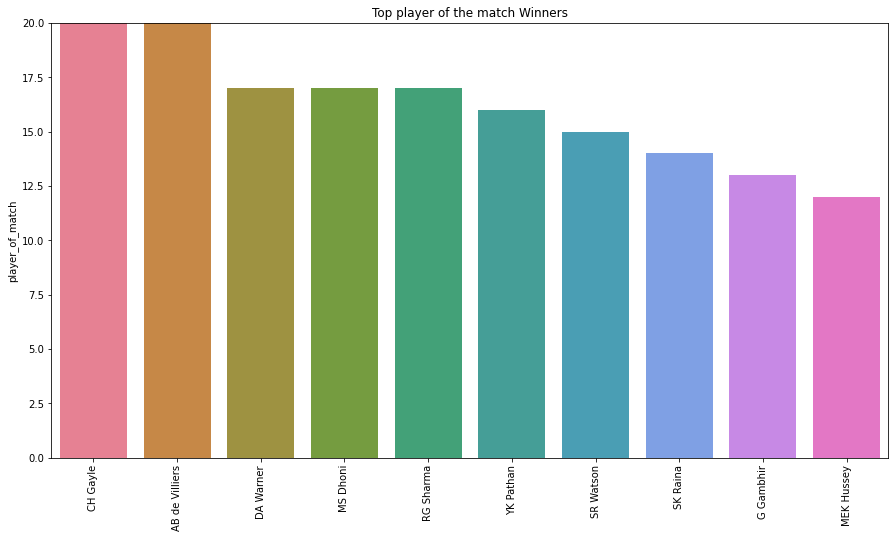

In [19]:
top_players = matches.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="husl");
plt.show()


**CH Gayle** is the most Successful player in all match winners

### Number of wins per team:

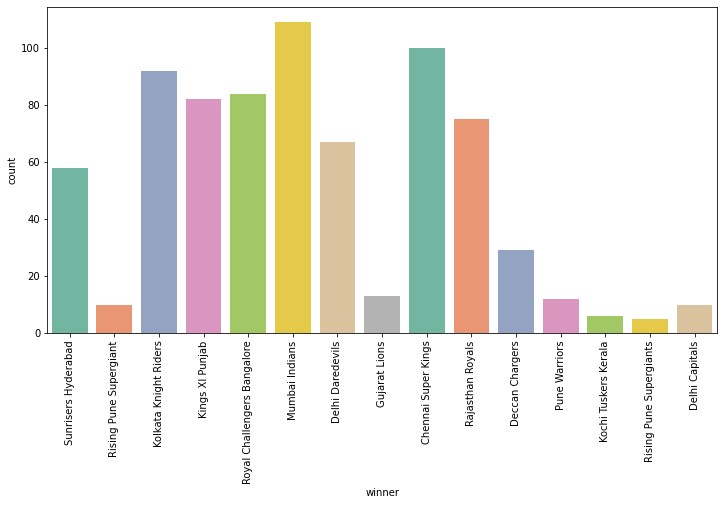

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=matches,palette="Set2")
plt.xticks(rotation=90)
plt.show()

**Mumbai Indians** is Leading the chart
while **Chennai Super Kings** is **Second**

### Number of matches in each Stadium:

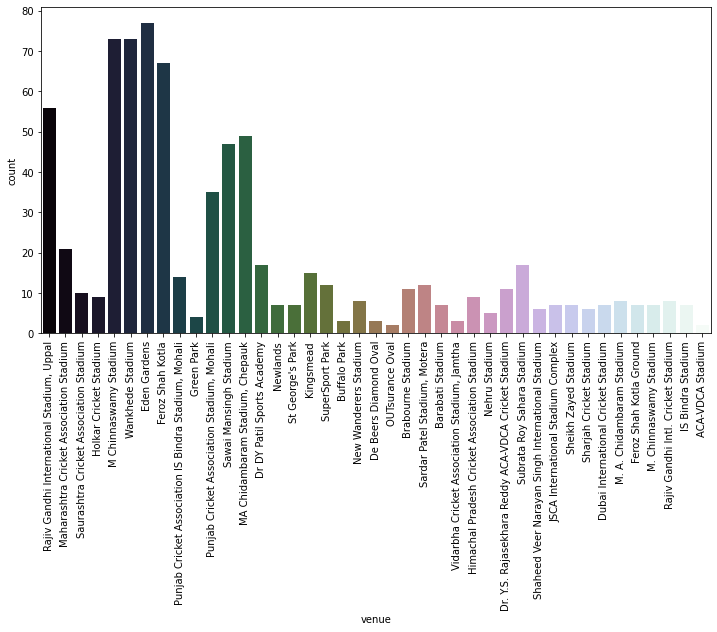

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches, palette= "cubehelix")
plt.xticks(rotation='vertical')
plt.show()

Most number of matches played in **"Eden Gardens"** Stadium

### Number of matches played by each team:

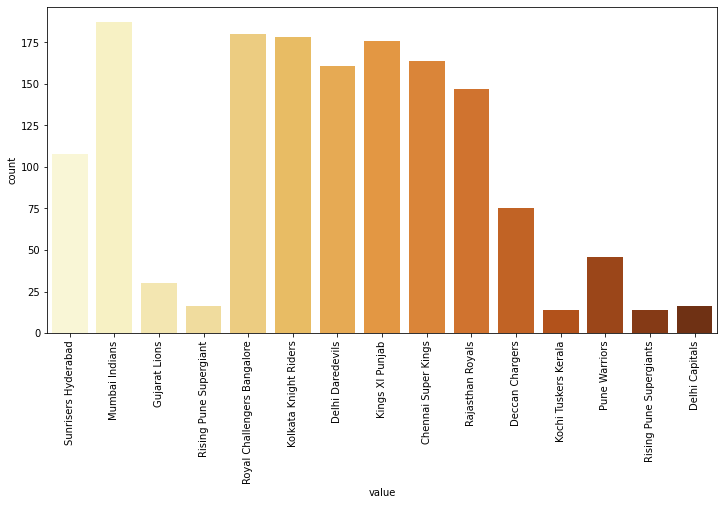

In [22]:
temp = pd.melt(matches, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp, palette="YlOrBr")
plt.xticks(rotation='vertical')
plt.show()

**Mumbai Indians** lead the pack with most number of matches 
while
**Royal Challengers Bangalore** is Second 

**'Rising Pune Supergiants'**, **'Gujarat Lions'** as they are new teams that came for only Two years that's why they played very few matches

### Seasonwise Champions :

In [23]:
temp= matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


**Mumbai Indians** has won the winner title Five times

### Toss decision:



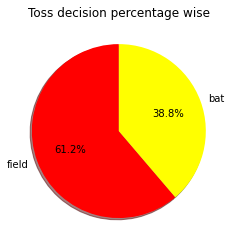

In [24]:
series = matches.toss_decision.value_counts()
labels = (np.array(series.index))
sizes = (np.array((series / series.sum())*100))
colors = ['Red', 'yellow']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage wise")
plt.show()

**61%**of the toss decisions are made to **field** first

### Decision varied over time

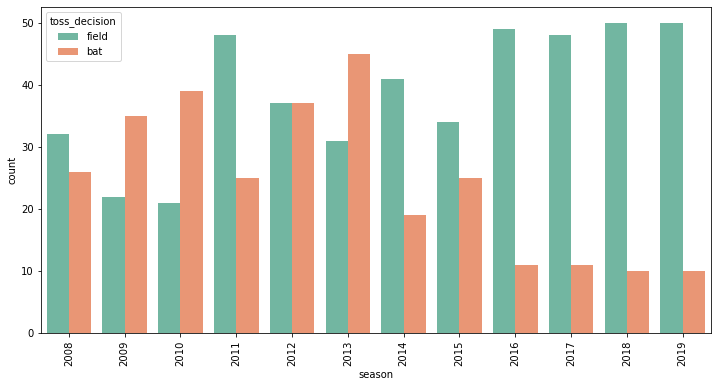

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches, palette= "Set2")
plt.xticks(rotation='vertical')
plt.show()

It seems during the starting years, teams wanted to **bat first** after **2014** most of time teams wanted to **field first**

### Win percentage batting second

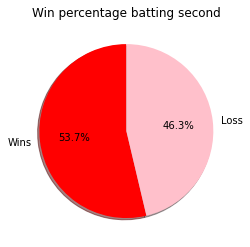

In [26]:
num_of_wins = (matches.win_by_wickets>0).sum()
num_of_loss = (matches.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['Red', 'pink']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

Batting second has won is **53.7%**

### Top players of the match Awardees

In [27]:
# create a function for labeling #
def label(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

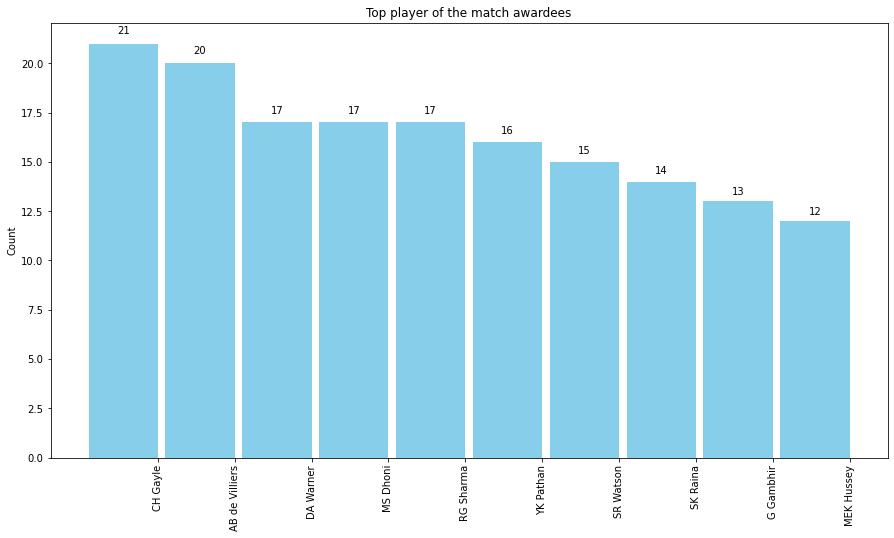

In [28]:
series = matches.player_of_match.value_counts()[:10]
labels = np.array(series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(series), width=width, color= 'skyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
label(rects)
plt.show()

**CH Gayle** is the top player of the match awardee in all the seasons

### Most of the time umpires

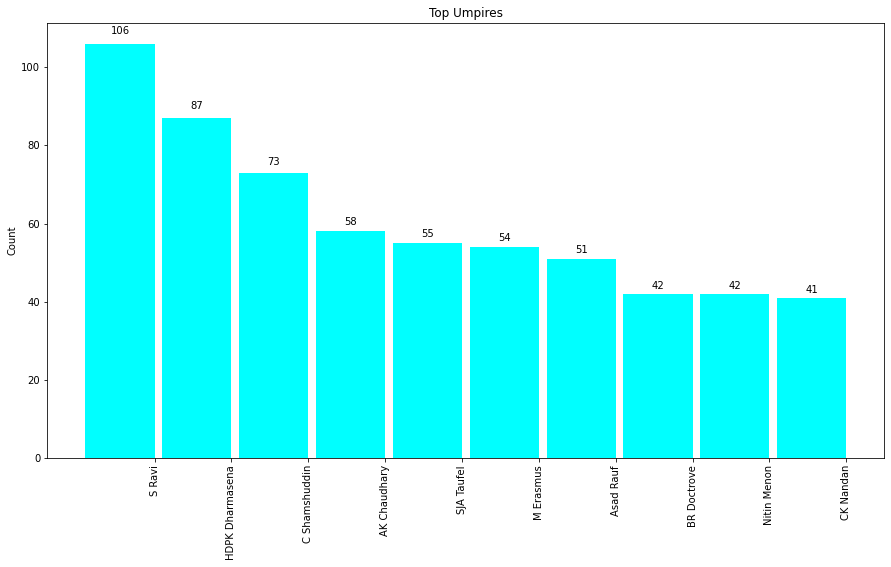

In [29]:
temp = pd.melt(matches, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

series = temp.value.value_counts()[:10]
labels = np.array(series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(series), width=width,color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
label(rects)
plt.show()

**S Ravi** to be the most of the time umpire for IPL matches

## Batsman Analysis

### Most number of IPL runs

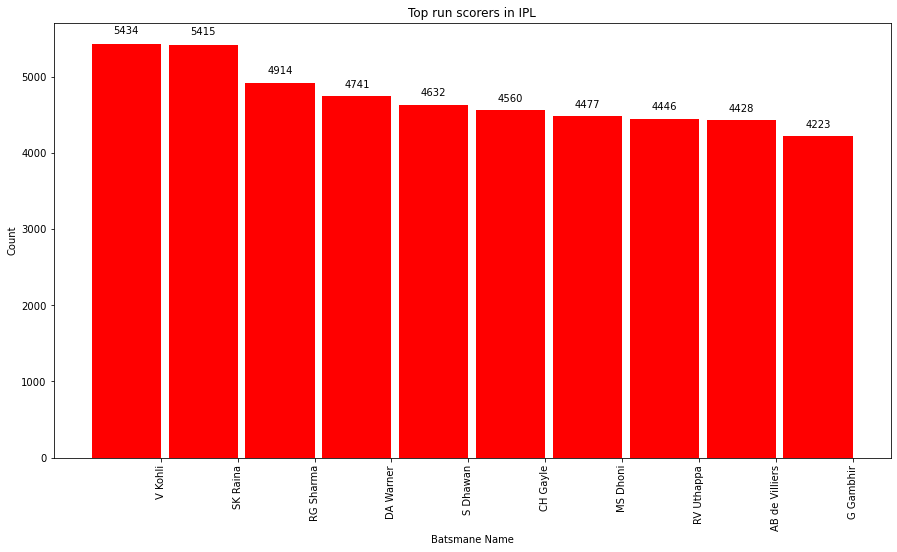

In [30]:
temp = score.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp = temp.iloc[:10,:]

labels = np.array(temp['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp['batsman_runs']), width=width, color='Red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
label(rects)
plt.show()

**Virat Kohli** is leading Top Scorer closely by **SK Raina** among **Indian Players**. 

**Gayle** is the top scorer among **Foreign players**

## Players with more number of boundaries

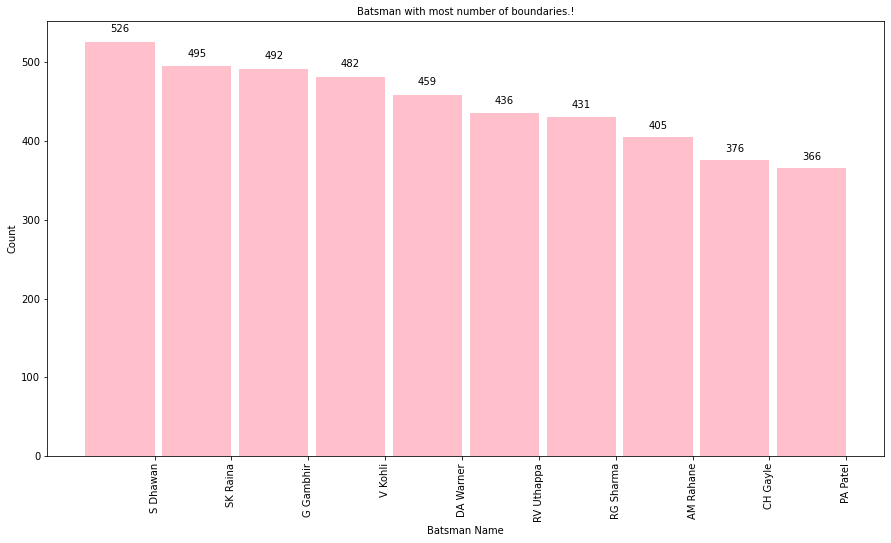

In [31]:
temp = score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp = temp.iloc[:10,:]

labels = np.array(temp['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp['batsman_runs']), width=width, color='pink')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_xlabel('Batsman Name')
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
label(rects)
plt.show()

**S Dhawan** has scored most number of Boundries followed closely by **SK Raina**

## Batsman with most number of sixes

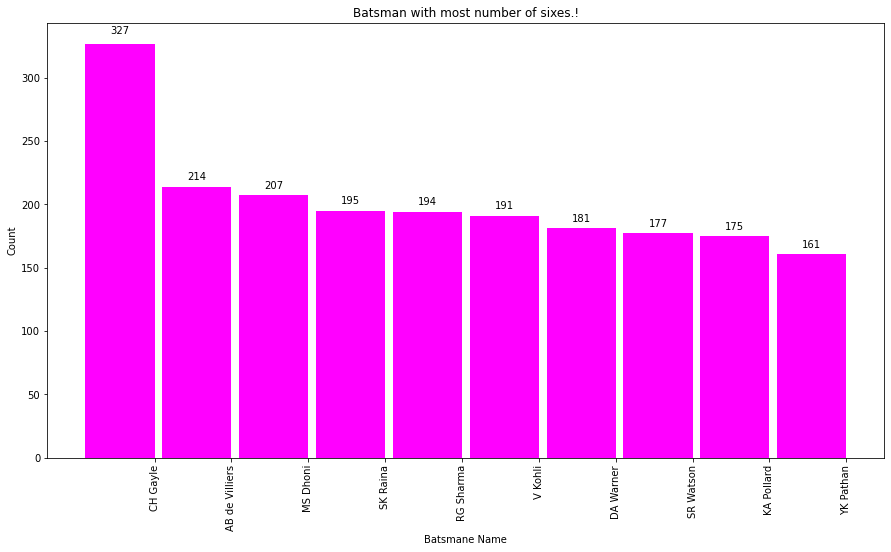

In [32]:
temp = score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp = temp.iloc[:10,:]

labels = np.array(temp['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp['batsman_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
ax.set_xlabel('Batsmane Name')
label(rects)
plt.show()

**CH Gayle** has hitted most number of sixes followed closely by **AB de Villiers**

& **Ms Dhoni** on 3rd number among Indian players 

## Batsman played most number of Dot balls

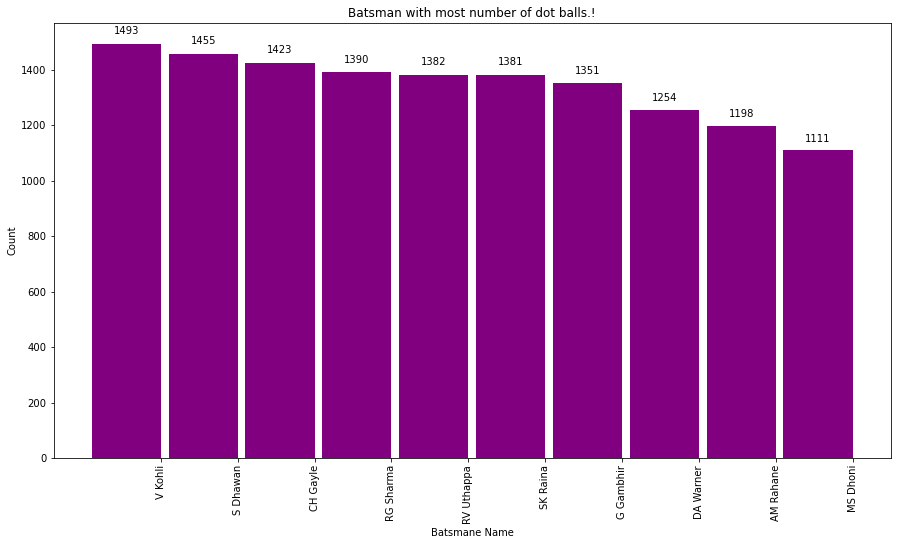

In [33]:
temp = score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp = temp.iloc[:10,:]

labels = np.array(temp['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp['batsman_runs']), width=width, color="purple")
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
ax.set_xlabel('Batsmane Name')
label(rects)
plt.show()

#### I think since these guys have played more number of balls, they have more dot balls as well.

## Bowler Analysis:

### Bowlers who has bowled most number

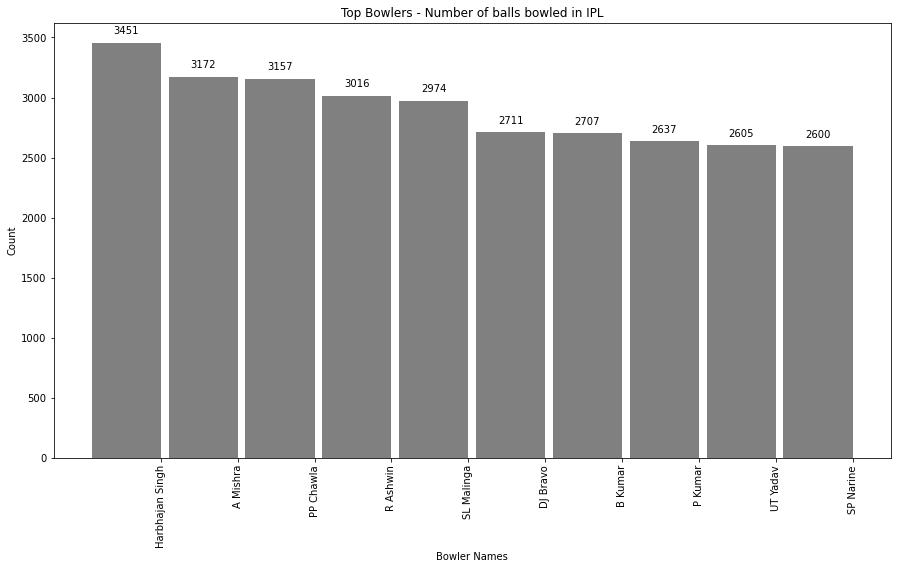

In [34]:
temp = score.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp = temp.iloc[:10,:]

labels = np.array(temp['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp['ball']), width=width, color='grey')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
label(rects)
plt.show()


**Harbhajan Singh** is the the bowler with most number of balls bowled in IPL matches

### Bowler with more number of dot balls

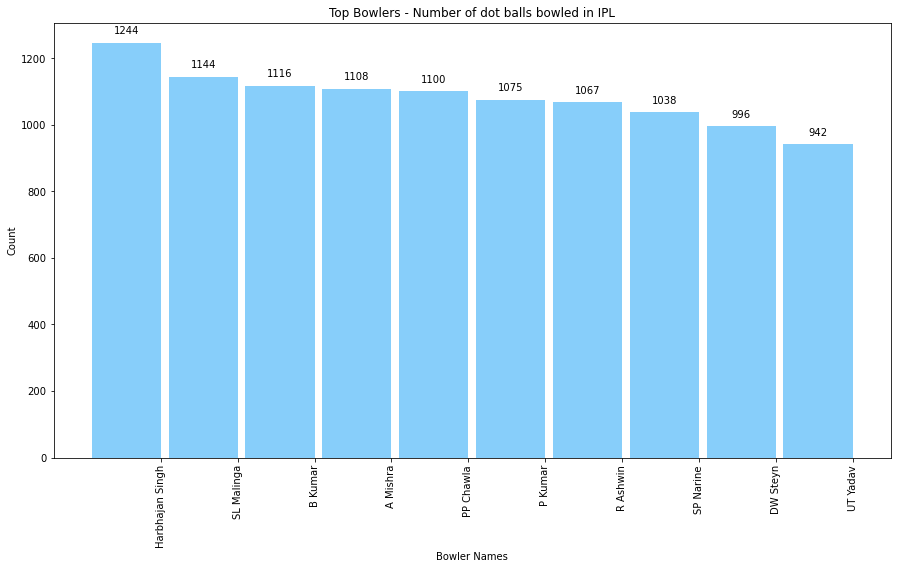

In [35]:
temp = score.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp = temp.iloc[:10,:]

labels = np.array(temp['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
label(rects)
plt.show()

**Harbhajan Singh** was bowled more number of dot balls followed by **B Kumar** and **SL Malinga**

## Most common dismissal types

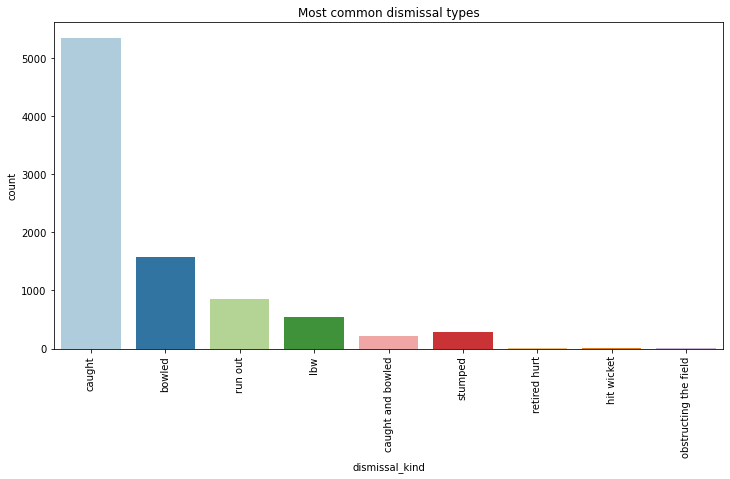

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score, palette="Paired")
plt.xticks(rotation='vertical')
plt.title("Most common dismissal types")
plt.show()

**Caught** is the most common dismissal type in IPL followed by Bowled

## Bowlers who has bowled more number of extras

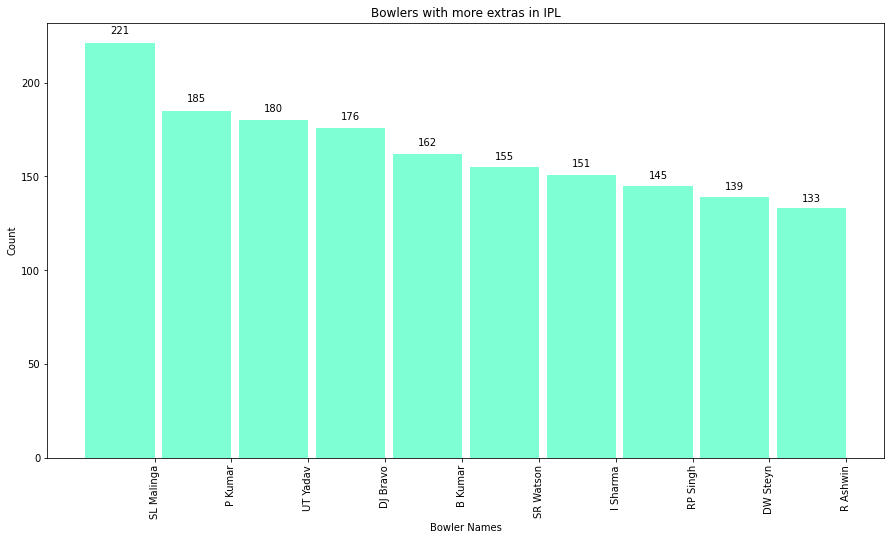

In [37]:
temp = score.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp = temp.iloc[:10,:]

labels = np.array(temp['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp['extra_runs']), width=width, color='aquamarine')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
label(rects)
plt.show()

SL Malinga tops the chart with 221 extra runs followed by **Pravin Kumar**.

##                                                        Thank You.....!!